In [115]:
# Manipulação de dados e visualização.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
import kagglehub

# Statistical analysis
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dividir os dados.
from sklearn.model_selection import train_test_split


# Filtrar avisos.
import warnings
warnings.filterwarnings('ignore')

### Configurações de Visualização
%matplotlib inline


In [5]:
os.makedirs('output', exist_ok=True)

In [100]:
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [14]:
def data_info(df):
    """
    Creates a summary DataFrame containing information about each column in the input DataFrame.
    
    Parameters:
        df (pandas.DataFrame): Input DataFrame to analyze
        
    Returns:
        pandas.DataFrame: A DataFrame with the following columns:
            - dtypes: Data type of each column
            - Missing: Number of missing values in each column
            - Unique: Number of unique values in each column
            - Example: First value from each column
            - Entropy: Shannon entropy of value distributions (in bits)
            
    Notes:
        - Prints the shape of the input DataFrame
        - Entropy is calculated using scipy.stats.entropy with base 2
        - Higher entropy values indicate more uniform distributions
    """
    info = pd.DataFrame({
        'dtypes': df.dtypes,
        'Missing': df.isna().sum(),
        'Unique': df.nunique(),
        'Example': df.iloc[0],
        'Entropy': [round(stats.entropy(df[col].value_counts(normalize=True), base=2), 2) 
                   for col in df.columns]
    })
    
    print(f"Dataset Shape: {df.shape}")
    return info

Temos 21 colunas no conjunto de dados, como segue:

* **id**: ID único para cada casa vendida
* **date**: Data da venda da casa
* **price**: Preço de cada casa vendida
* **bedrooms**: Número de quartos
* **bathrooms**: Número de banheiros, onde 0,5 conta para um cômodo com vaso sanitário, mas sem chuveiro
* **sqft living**: Metragem quadrada do espaço interno habitável do apartamento
* **sqft lot**: Metragem quadrada do terreno
* **floors**: Número de andares
* **waterfront**: Uma variável dummy para indicar se o apartamento tinha vista para a orla ou não
* **view**: Um índice de 0 a 4 de quão boa era a vista da propriedade
* **condition**: Um índice de 1 a 5 sobre a condição do apartamento
* **grade**: Um índice de 1 a 13, onde 1 fica aquém da construção e design do edifício e 13 tem um alto nível de qualidade de construção e design
* **sqft above**: A metragem quadrada do espaço interno da casa que está acima do nível do solo
* **sqft basement**: A metragem quadrada do espaço interno da casa que está abaixo do nível do solo
* **yr built**: O ano em que a casa foi construída inicialmente
* **yr renovated**: O ano da última reforma da casa
* **zipcode**: A área do CEP em que a casa está localizada
* **lat**: Latitude
* **long**: Longitude
* **sqft living15**: A metragem quadrada do espaço interno habitável das 15 casas vizinhas mais próximas
* **sqft lot15**: A metragem quadrada dos terrenos das 15 casas vizinhas mais próximas.


In [16]:
print(f'Duplicated rows: {df.duplicated().sum()}')
data_info(df)

Duplicated rows: 0
Dataset Shape: (21613, 21)


dtypes  Missing  Unique          Example  Entropy
id               int64        0   21436       7129300520    14.38
date            object        0     372  20141013T000000     8.11
price          float64        0    4028         221900.0    10.16
bedrooms         int64        0      13                3     1.88
bathrooms      float64        0      30              1.0     3.19
sqft_living      int64        0    1038             1180     8.52
sqft_lot         int64        0    9782             5650    12.12
floors         float64        0       6              1.0     1.54
waterfront       int64        0       2                0     0.06
view             int64        0       5                0     0.64
condition        int64        0       5                3     1.27
grade            int64        0      12                7     2.19
sqft_above       int64        0     946             1180     8.27
sqft_basement    int64        0     306                0     3.77
yr_built         int64        0     116             1955     6.60
yr_renovated     int64        0      70                0     0.49
zipcode          int64        0      70            98178     5.97
lat            float64        0    5034          47.5112    12.01
long           float64        0     752         -122.257     8.86
sqft_living15    int64        0     777             1340     8.11
sqft_lot15       int64        0    8689             5650    11.83

In [26]:
df.select_dtypes(include='number').describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

<Axes: >

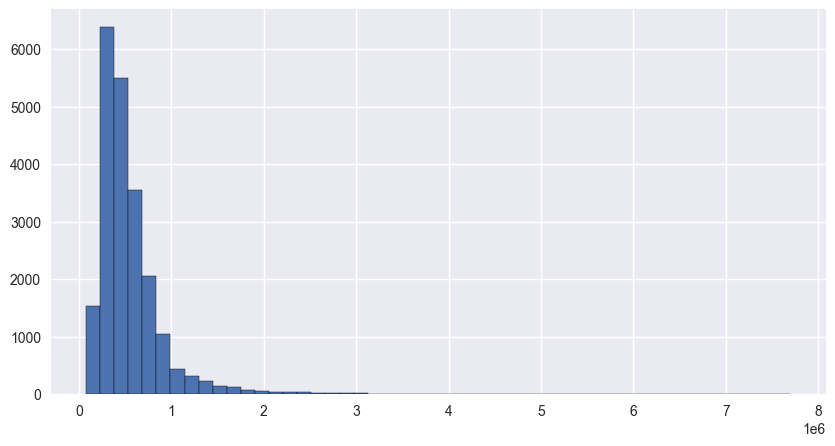

In [99]:
df['price'].hist(figsize=(10, 5), bins=50, edgecolor='black')

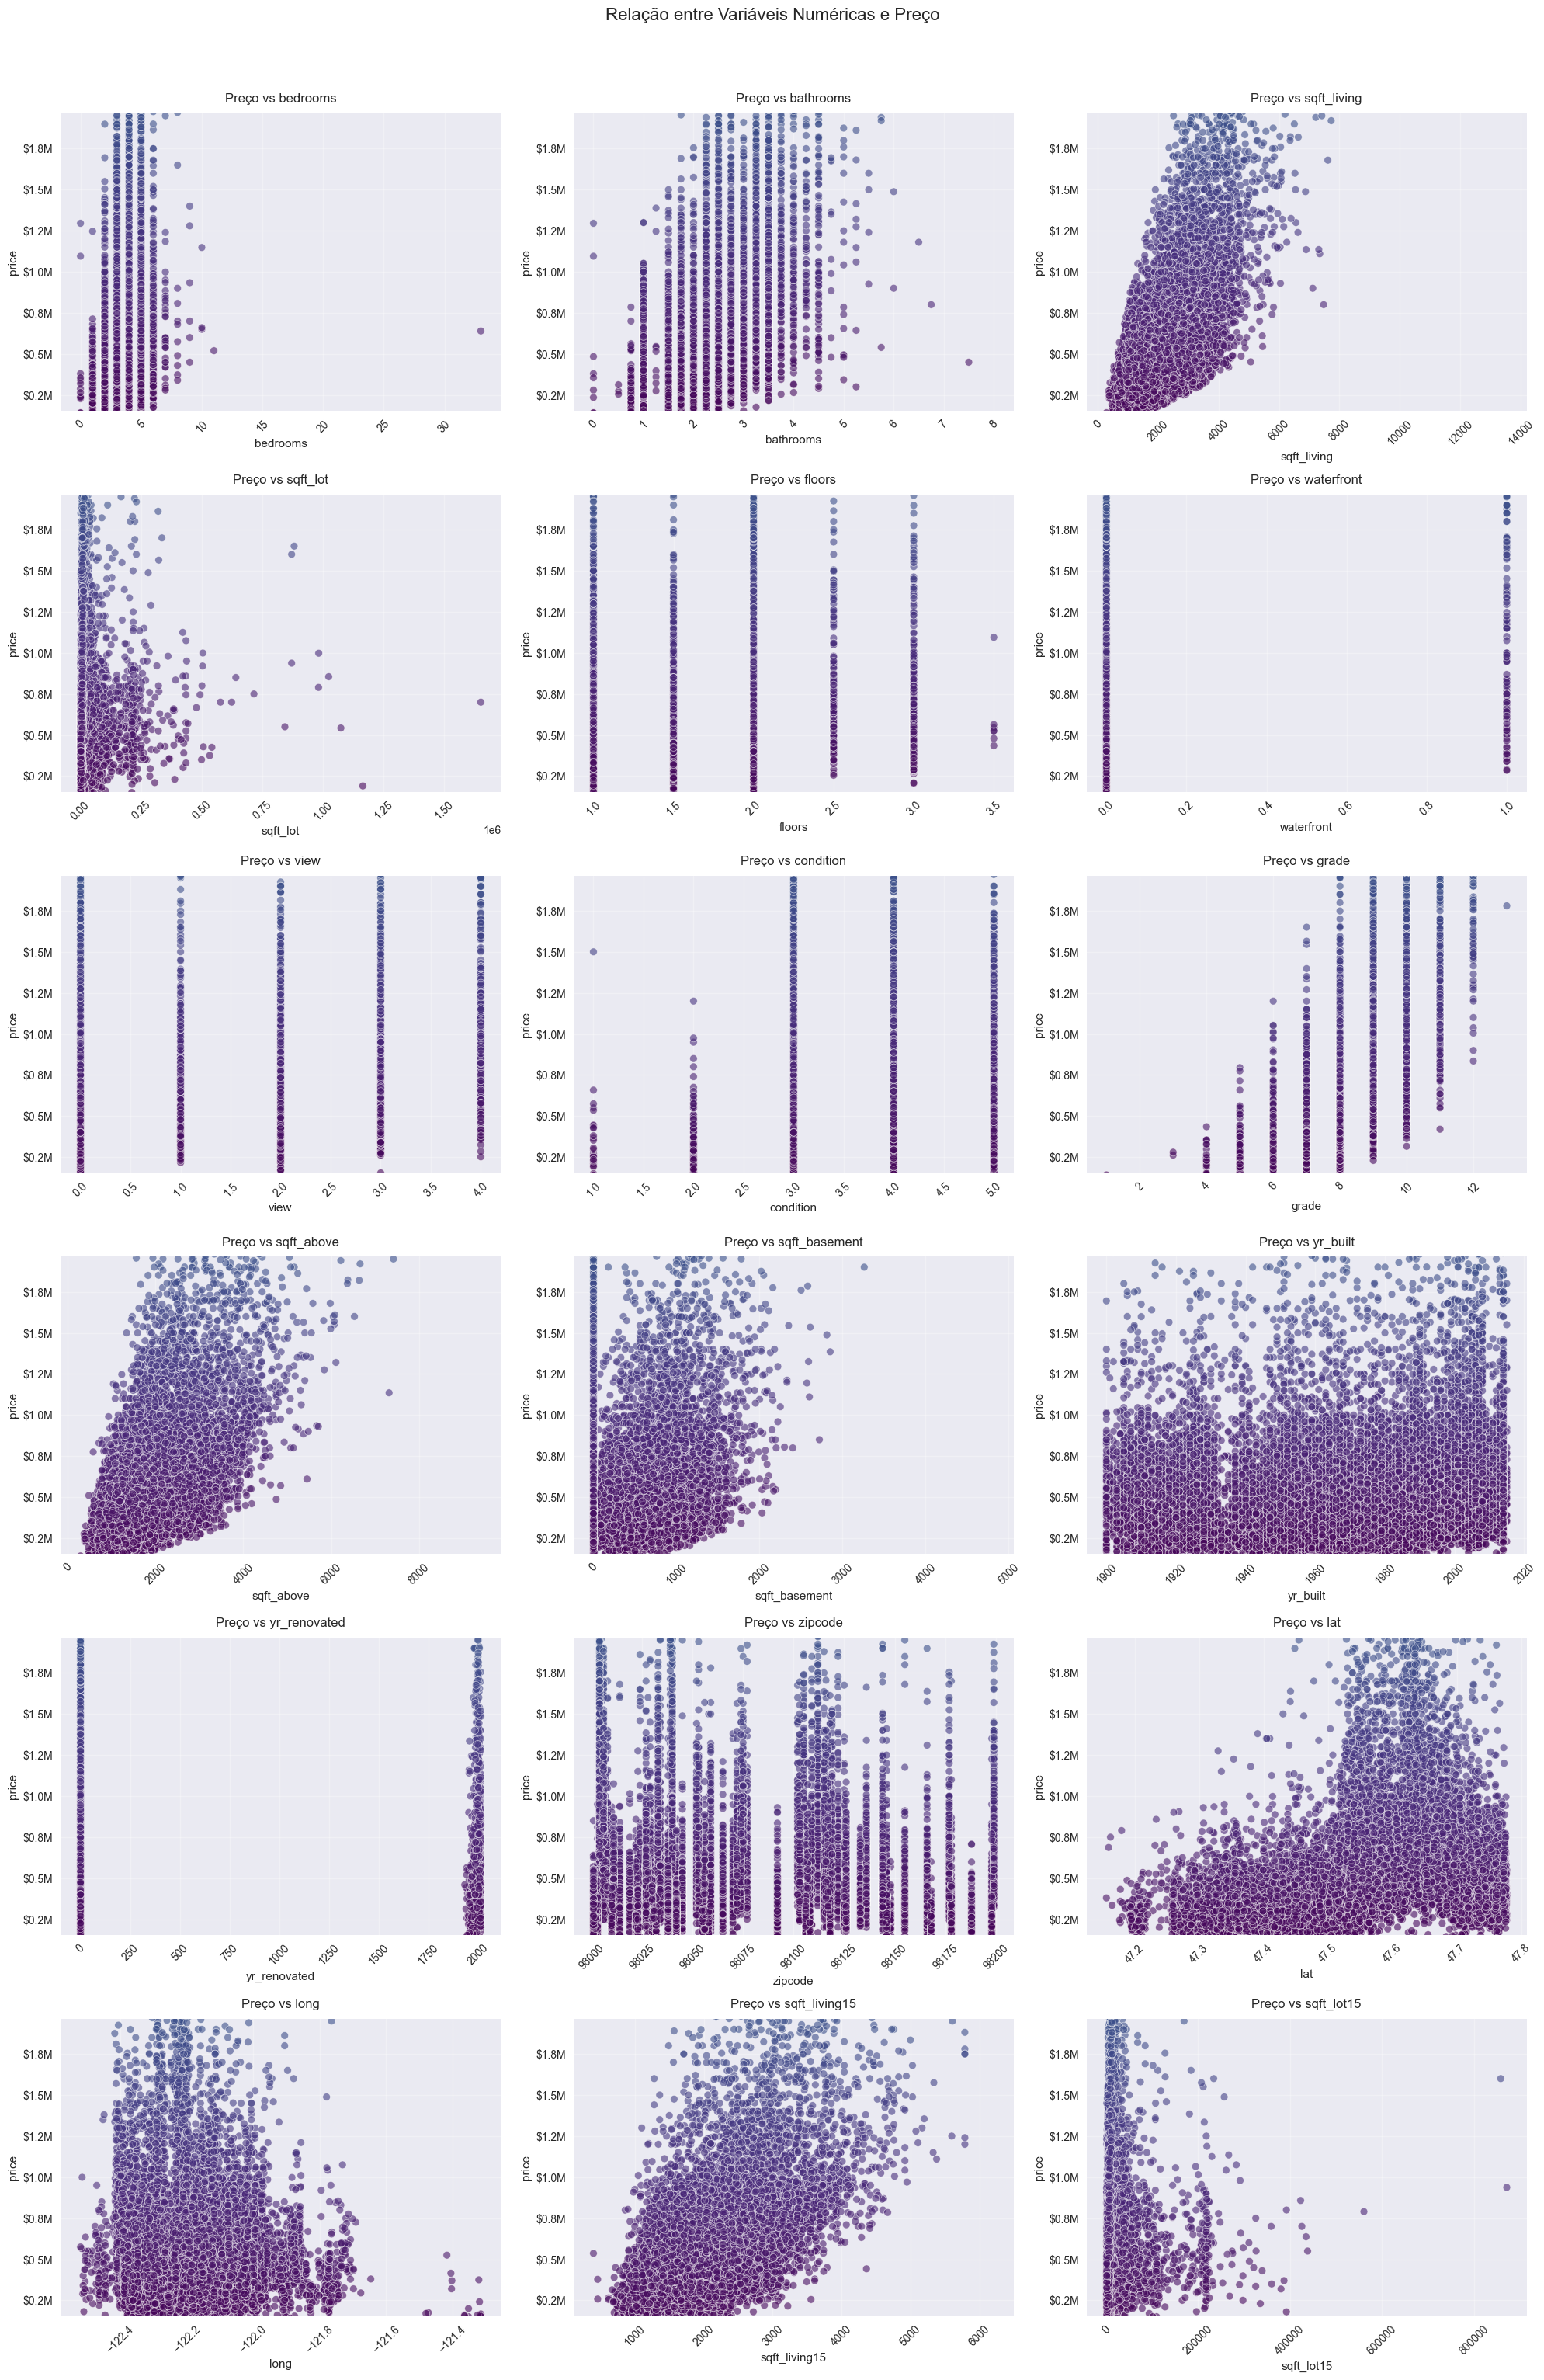

In [101]:
# Selecionar apenas as colunas numéricas, excluindo 'id' e 'price'
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['id', 'price']]

# Configurar o estilo
plt.style.use('seaborn')
sns.set_palette("husl")

# Calcular o número de linhas necessárias
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Criar a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Criar scatterplots
for idx, col in enumerate(numeric_cols):
    sns.scatterplot(
        data=df,
        x=col,
        y='price',
        hue='price',
        palette='viridis',
        alpha=0.6,
        s=50,
        ax=axes[idx]
    )
    
    # Formatar o eixo y (preço) em milhões
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # Ajustar os limites do eixo y para remover outliers extremos
    q1 = df['price'].quantile(0.01)
    q3 = df['price'].quantile(0.99)
    axes[idx].set_ylim(q1, q3)
    
    # Remover a legenda
    axes[idx].get_legend().remove()
    
    # Adicionar título
    axes[idx].set_title(f'Preço vs {col}', pad=10)
    
    # Rotacionar labels do eixo x
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Adicionar grid
    axes[idx].grid(True, alpha=0.3)

# Remover subplots vazios
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

# Ajustar o layout
plt.suptitle('Relação entre Variáveis Numéricas e Preço', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [108]:
df_sample = df.drop(columns=['id'])
df_sample.date = pd.to_datetime(df_sample.date)
df_sample['year'] = df_sample.date.dt.year
df_sample['month'] = df_sample.date.dt.month
df_sample['day'] = df_sample.date.dt.day
df_sample.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0           0     0          3  ...      1955             0    98178  47.5112   
1           0     0          3  ...      1951          1991    98125  47.7210   

      long  sqft_living15  sqft_lot15  year  month  day  
0 -122.257           1340        5650  2014     10   13  
1 -122.319           1690        7639  2014     12    9  

[2 rows x 23 columns]

In [119]:
colunas_numericas = df_sample.select_dtypes(include='number').columns.tolist()

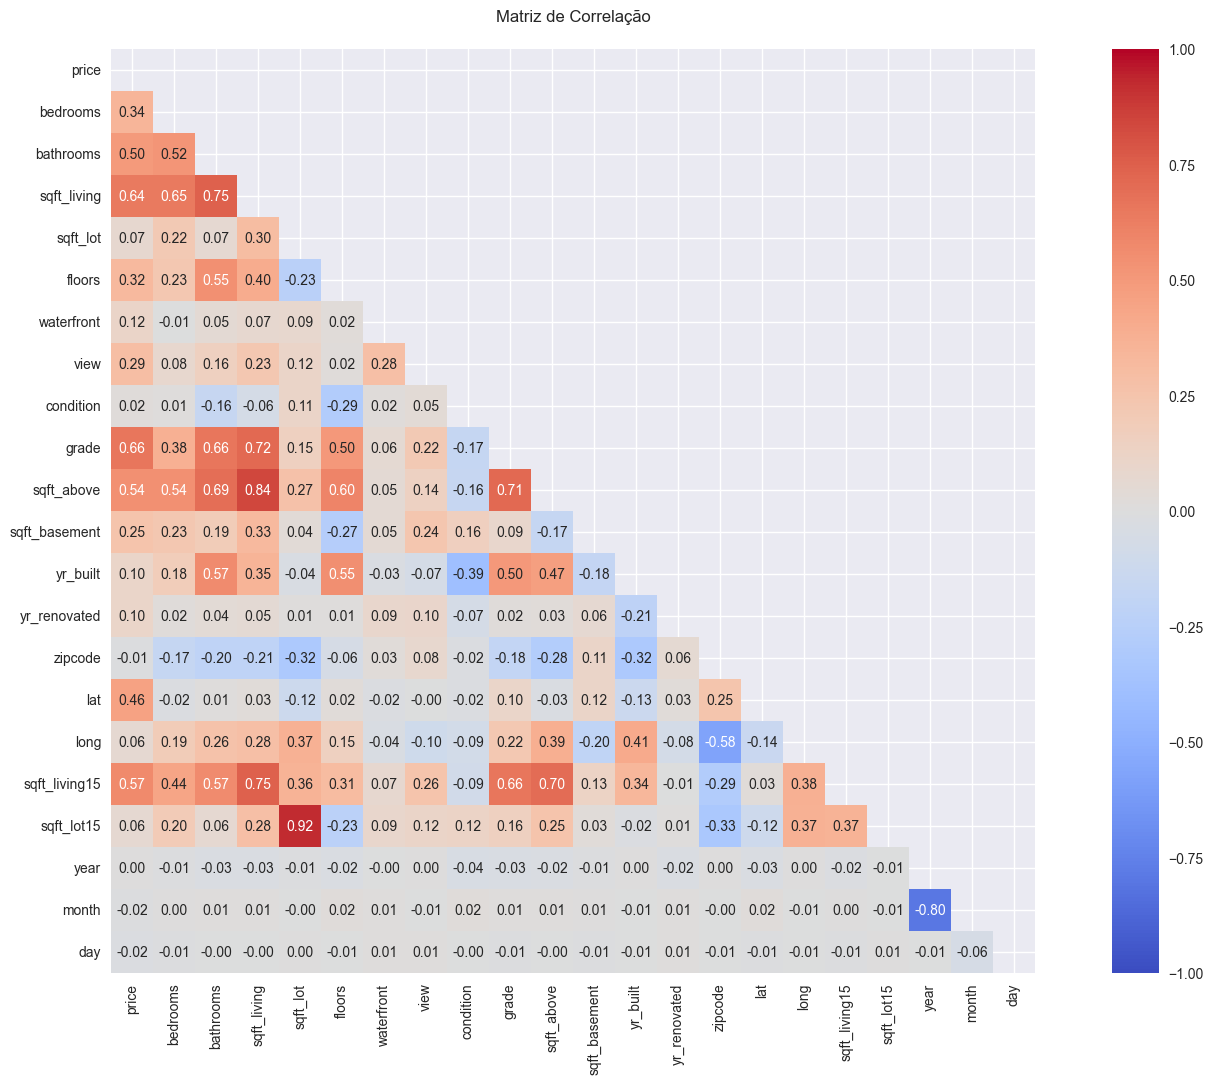

In [131]:
corr_matrix = df_sample[colunas_numericas].corr(method='spearman')
plt.figure(figsize=(20, 12))
mask = np.triu(np.ones_like(df_sample.corr(numeric_only=True), dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,  # aplica a máscara
            vmin=-1, 
            vmax=1, 
            annot=True,  # mostra os valores
            cmap='coolwarm',  # esquema de cores
            center=0,  # centraliza o colormap em 0
            square=True,  # células quadradas
            fmt='.2f')  # formato dos números (2 casas decimais)
plt.title('Matriz de Correlação', pad=20)

plt.show()

In [125]:
def check_outliers(data: pd.DataFrame, features: list) -> pd.DataFrame:
    """
    Identifica e calcula a porcentagem de outliers para cada característica usando o método IQR.
    
    Parâmetros:
    - data: DataFrame com os dados
    - features: Lista de características para análise
    
    Retorna:
    - DataFrame com a porcentagem de outliers por característica
    """
    
    resultados = []
    
    for feature in features:
        # Calcula Q1, Q3 e IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define limites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Conta outliers
        n_outliers = data[
            (data[feature] < limite_inferior) | 
            (data[feature] > limite_superior)
        ].shape[0]
        
        # Calcula porcentagem
        pct_outliers = (n_outliers / len(data)) * 100
        
        resultados.append({
            'caracteristica': feature,
            'total_registros': len(data),
            'n_outliers': n_outliers,
            'pct_outliers': round(pct_outliers, 2)
        })
    
    # Cria DataFrame com resultados
    df_outliers = pd.DataFrame(resultados)
    
    # Ordena por porcentagem de outliers (decrescente)
    df_outliers = df_outliers.sort_values('pct_outliers', ascending=False)
    
    return df_outliers



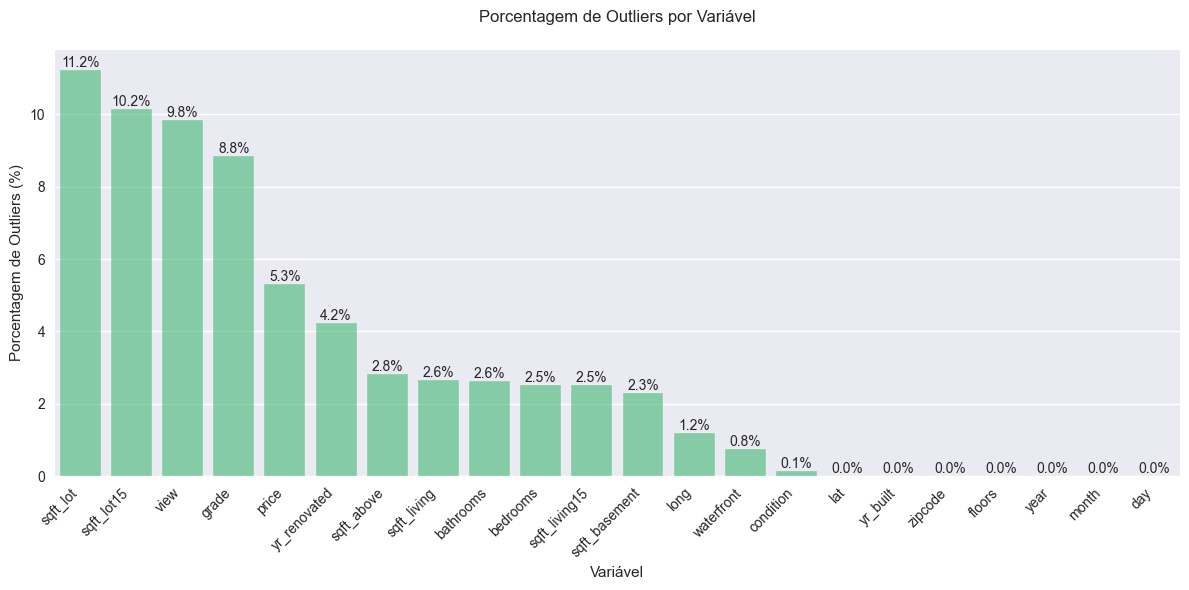

In [141]:
# Analisa outliers
df_outliers = check_outliers(df_sample, colunas_numericas)

# Visualização dos resultados
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_outliers,
    x='caracteristica',
    y='pct_outliers',
    color='#2ecc71',
    alpha=0.6
)

plt.title('Porcentagem de Outliers por Variável', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variável')
plt.ylabel('Porcentagem de Outliers (%)')

# Adiciona valores nas barras
for i, v in enumerate(df_outliers['pct_outliers']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [142]:
df_outliers

caracteristica  total_registros  n_outliers  pct_outliers
4        sqft_lot            21613        2425         11.22
18     sqft_lot15            21613        2194         10.15
7            view            21613        2124          9.83
9           grade            21613        1911          8.84
0           price            21613        1146          5.30
13   yr_renovated            21613         914          4.23
10     sqft_above            21613         611          2.83
3     sqft_living            21613         572          2.65
2       bathrooms            21613         571          2.64
1        bedrooms            21613         546          2.53
17  sqft_living15            21613         544          2.52
11  sqft_basement            21613         496          2.29
16           long            21613         256          1.18
6      waterfront            21613         163          0.75
8       condition            21613          30          0.14
15            lat            21613           2          0.01
12       yr_built            21613           0          0.00
14        zipcode            21613           0          0.00
5          floors            21613           0          0.00
19           year            21613           0          0.00
20          month            21613           0          0.00
21            day            21613           0          0.00

In [103]:
imoveis_data = df_sample[['year', 'month', 'price']].groupby(['year', 'month']).agg(['min','max','mean','count'])
imoveis_data

price                                
                 min        max           mean count
year month                                          
2014 5       78000.0  3710000.0  548080.276584  1768
     6       92000.0  7062500.0  558002.199541  2180
     7       86500.0  3800000.0  544788.764360  2211
     8      107000.0  5570000.0  536445.276804  1940
     9       85000.0  6885000.0  529253.821871  1774
     10      89000.0  7700000.0  539026.971778  1878
     11      82000.0  3850000.0  521961.009213  1411
     12      95000.0  3300000.0  524461.866757  1471
2015 1       99000.0  3567000.0  525870.889571   978
     2       75000.0  3065000.0  507851.371200  1250
     3       81000.0  3395000.0  543977.187200  1875
     4       84000.0  5350000.0  561837.774989  2231
     5       95000.0  4208000.0  558126.811146   646

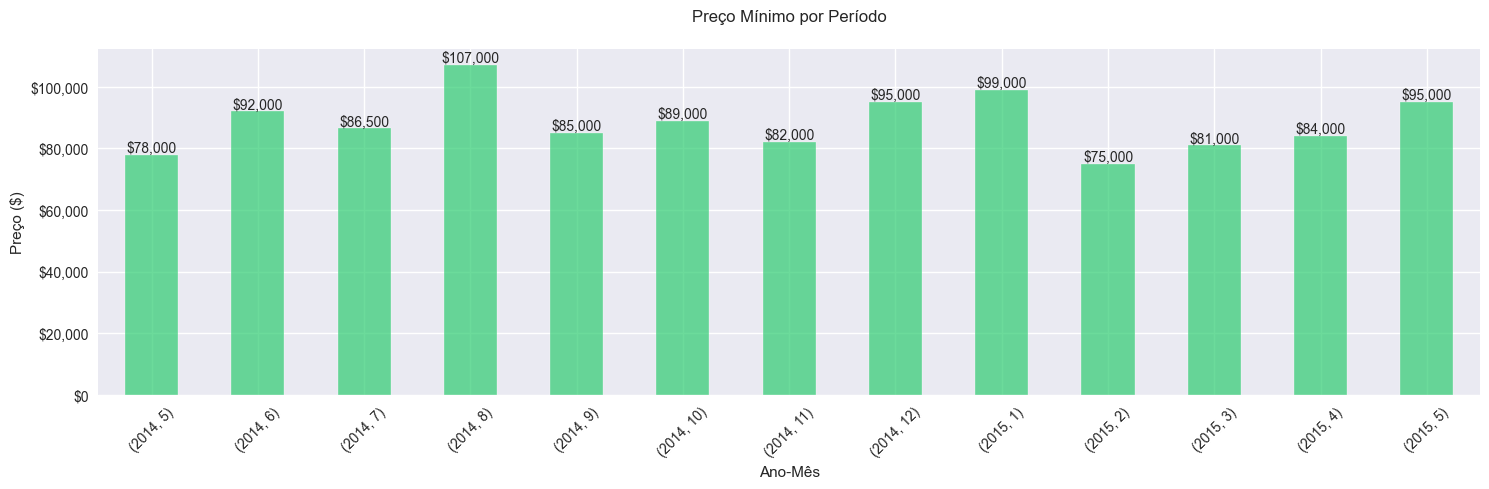

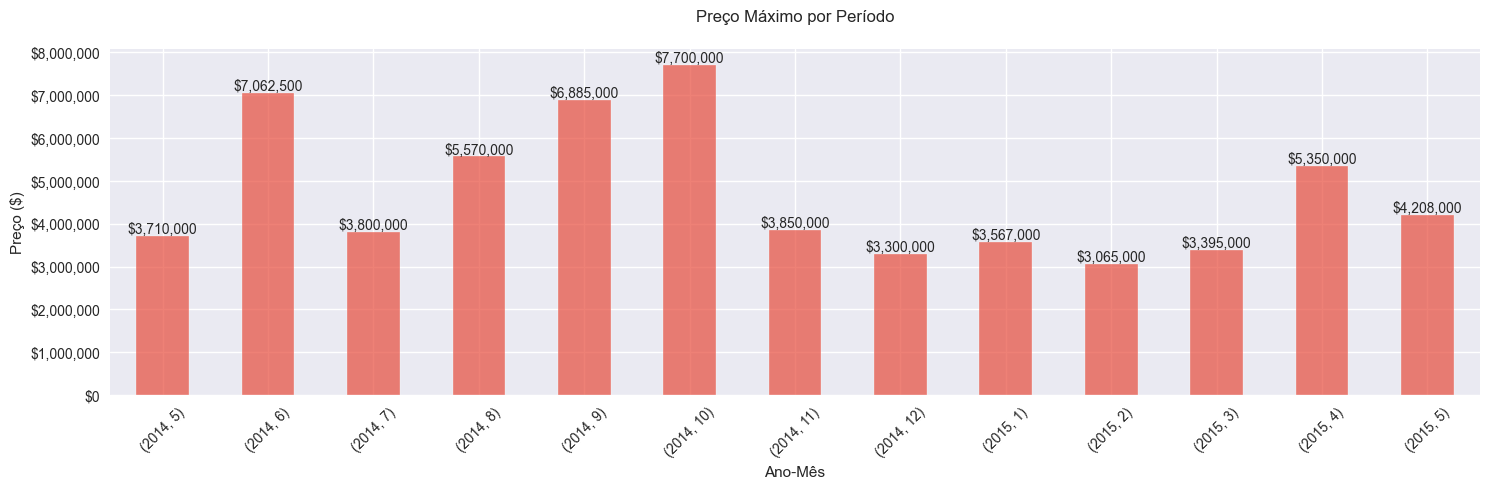

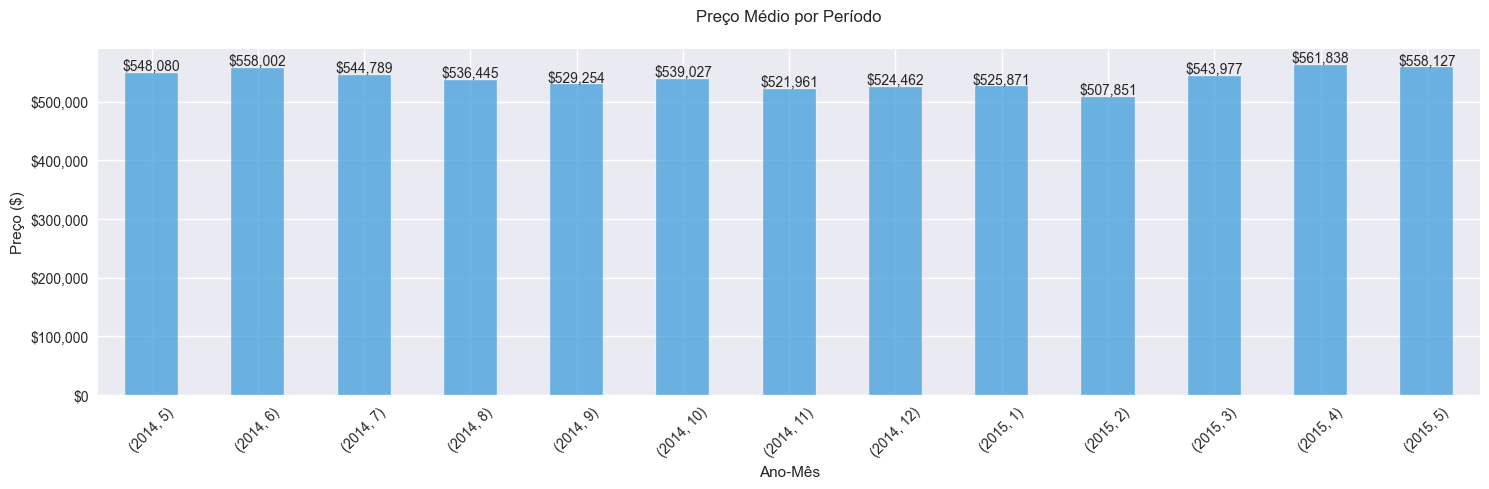

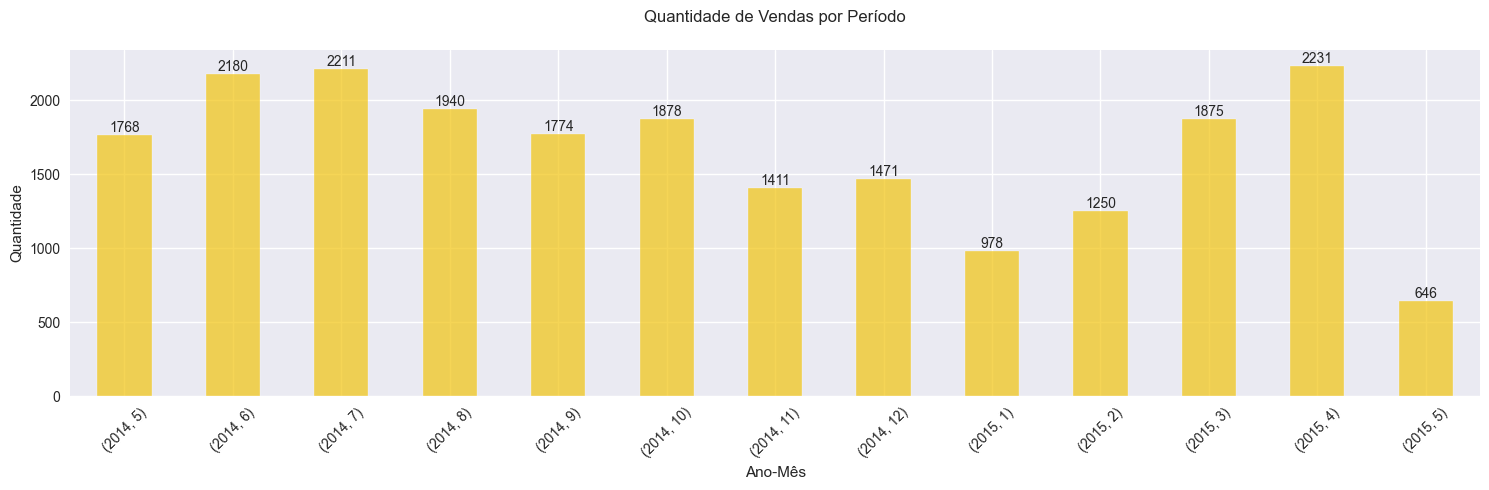

In [104]:
# Configurar o estilo
plt.style.use('seaborn')

# Cores para cada gráfico
cores = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f']

# Plot 1: Preço Mínimo
plt.figure(figsize=(15, 5))
ax1 = imoveis_data['price']['min'].plot(kind='bar', color=cores[0], alpha=0.7)
plt.title('Preço Mínimo por Período', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Preço ($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adicionar valores acima das barras
for i, v in enumerate(imoveis_data['price']['min']):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot 2: Preço Máximo
plt.figure(figsize=(15, 5))
ax2 = imoveis_data['price']['max'].plot(kind='bar', color=cores[1], alpha=0.7)
plt.title('Preço Máximo por Período', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Preço ($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adicionar valores acima das barras
for i, v in enumerate(imoveis_data['price']['max']):
    ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot 3: Preço Médio
plt.figure(figsize=(15, 5))
ax3 = imoveis_data['price']['mean'].plot(kind='bar', color=cores[2], alpha=0.7)
plt.title('Preço Médio por Período', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Preço ($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adicionar valores acima das barras
for i, v in enumerate(imoveis_data['price']['mean']):
    ax3.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot 4: Contagem de Vendas
plt.figure(figsize=(15, 5))
ax4 = imoveis_data['price']['count'].plot(kind='bar', color=cores[3], alpha=0.7)
plt.title('Quantidade de Vendas por Período', pad=20)
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for i, v in enumerate(imoveis_data['price']['count']):
    ax4.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()